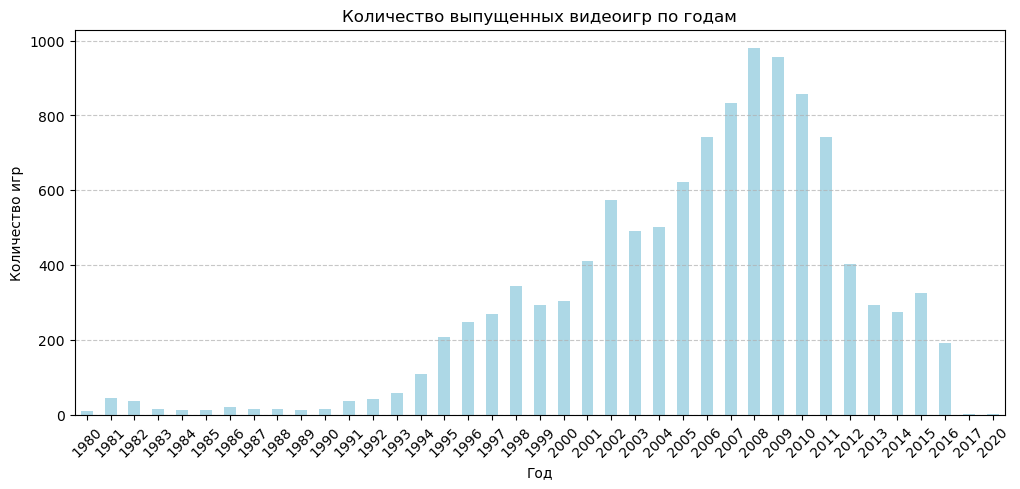

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Загружаем данные
data = pd.read_csv("vgsale_1.csv")

# 2️⃣ Очистка данных: убираем дубликаты по играм (агрегируем продажи)
def clean_game_sales(data):
    """
    Объединяет данные по одной и той же игре, вышедшей на разных платформах.
    Складывает продажи, оставляя уникальные записи.
    """
    clean_data = data.groupby(['Name', 'Year', 'Publisher'], as_index=False).agg({
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum',
        'Global_Sales': 'sum',
        'Genre': 'first',  # Берём жанр первой записи
        'Platform': lambda x: ', '.join(set(x))  # Записываем все платформы в одну строку
    })
    return clean_data

cleaned_data = clean_game_sales(data)

# Сохраняем очищенные данные
cleaned_data.to_csv("vgsale_cleaned.csv", index=False)

data = pd.read_csv("vgsale_cleaned.csv")

data["Year"] = data["Year"].fillna(0).astype(int)

# 3️⃣ График: Количество видеоигр по годам (без дубликатов по Name)
games_per_year = data.drop_duplicates(subset=["Name"]).groupby("Year")["Name"].count()

plt.figure(figsize=(12, 5))
games_per_year.plot(kind="bar", color="lightblue")
plt.title("Количество выпущенных видеоигр по годам")
plt.ylabel("Количество игр")
plt.xlabel("Год")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()